#### Campaign for selling personal loans:
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers
are liability customers (depositors) with varying size of deposits. The number of customers who are also
borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to
bring in more loan business and in the process, earn more through the interest on loans. In particular, the
management wants to explore ways of converting its liability customers to personal loan customers (while
retaining them as depositors). A campaign that the bank ran last year for liability customers showed a
healthy conversion rate of over 9% success. This has encouraged the retail marketing department to
devise campaigns with better target marketing to increase the success ratio with minimal budget.
The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce
the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic information
(age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the
customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers,
only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
Study the data
1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings.
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 70:30 respectively
5. Use a classification model to predict the likelihood of a liability customer buying personal loans
6. Explain why you chose one model over the other (do not use ensemble techniques yet)
7. Use ensemble techniques to improve the performance

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
 # To enable plotting graphs in Jupyter notebook
%matplotlib inline 

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

## import different model from scikit

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
url='C:\\MY_Personal\\GREATLAKES\\Assignment\\supervised_learning'

In [3]:
main_data = pd.read_excel(url+'\\Bank_Personal_Loan_Modelling.xlsx',sheetname='Data')

In [4]:
main_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df1=main_data.copy()

In [6]:
## remove space in column name 
df1.columns=df1.columns.str.replace(' ','')

In [7]:
df1.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
df1.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Min Experience is showing in negetive, convert it to 0

In [10]:
## replace negetive experience with 0
df1.loc[df1['Experience']<0,'Experience']=0

In [11]:
## check for null data
df1.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

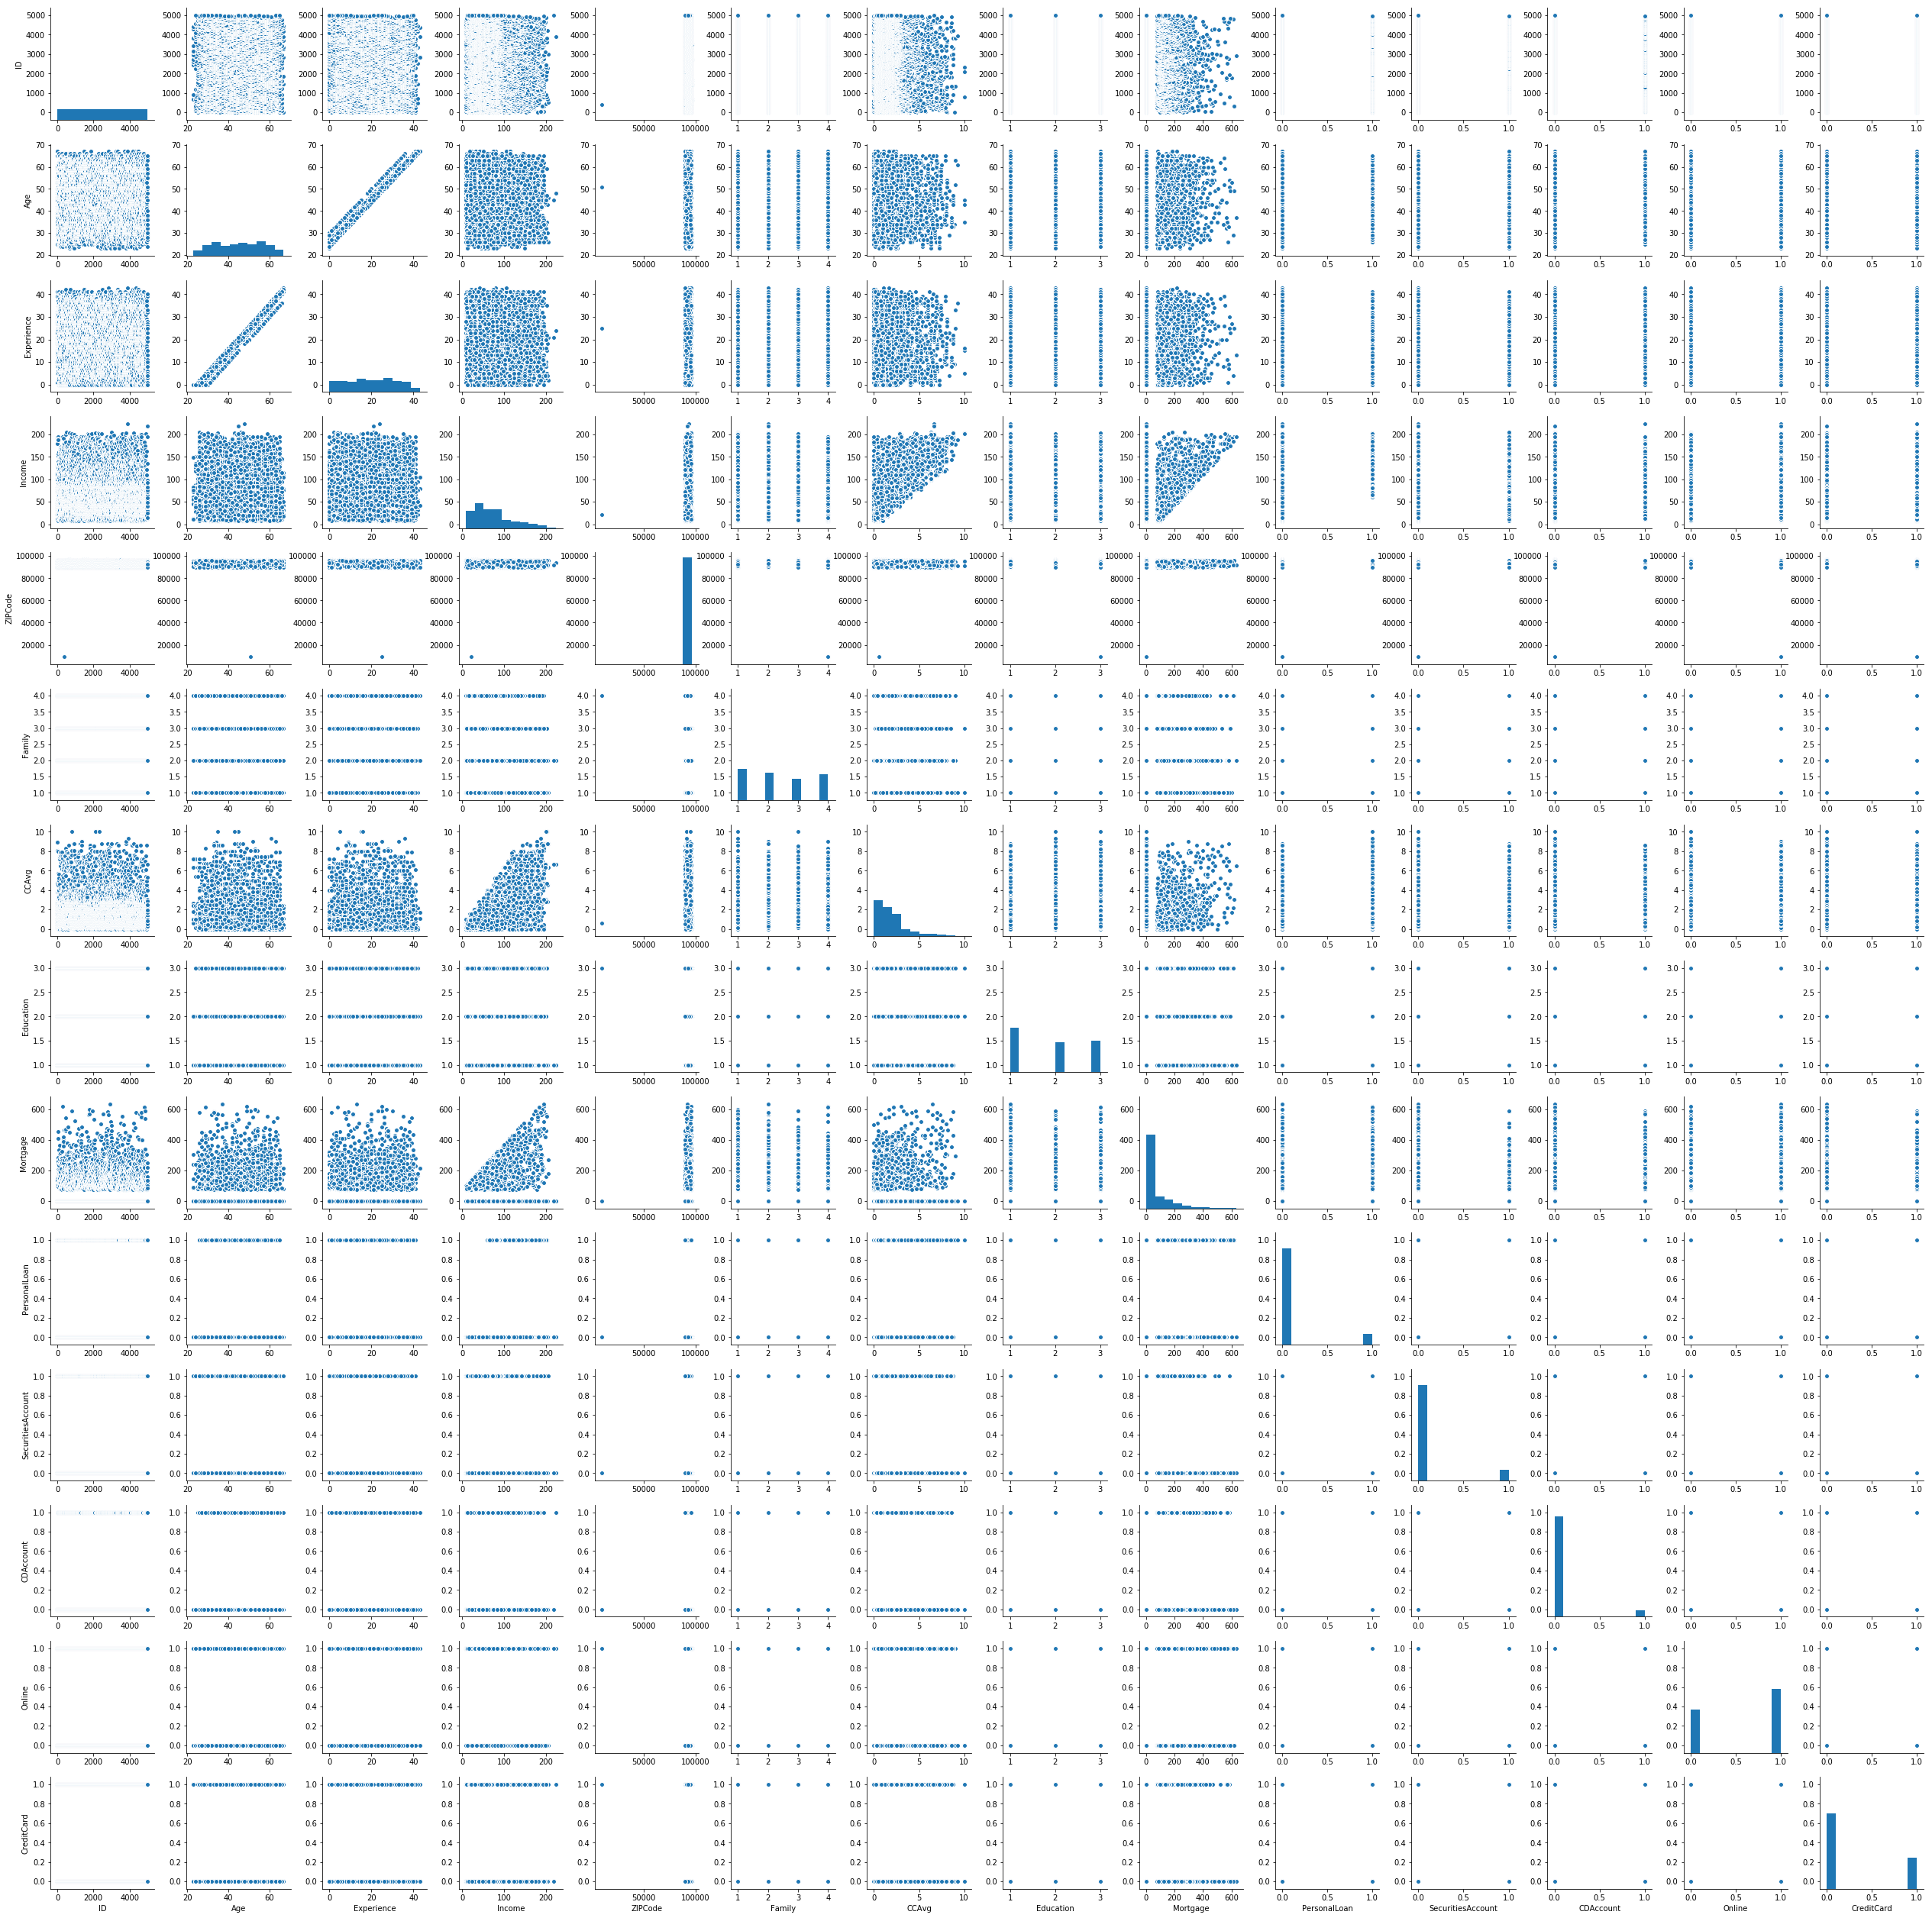

In [12]:
sns.pairplot(df1)

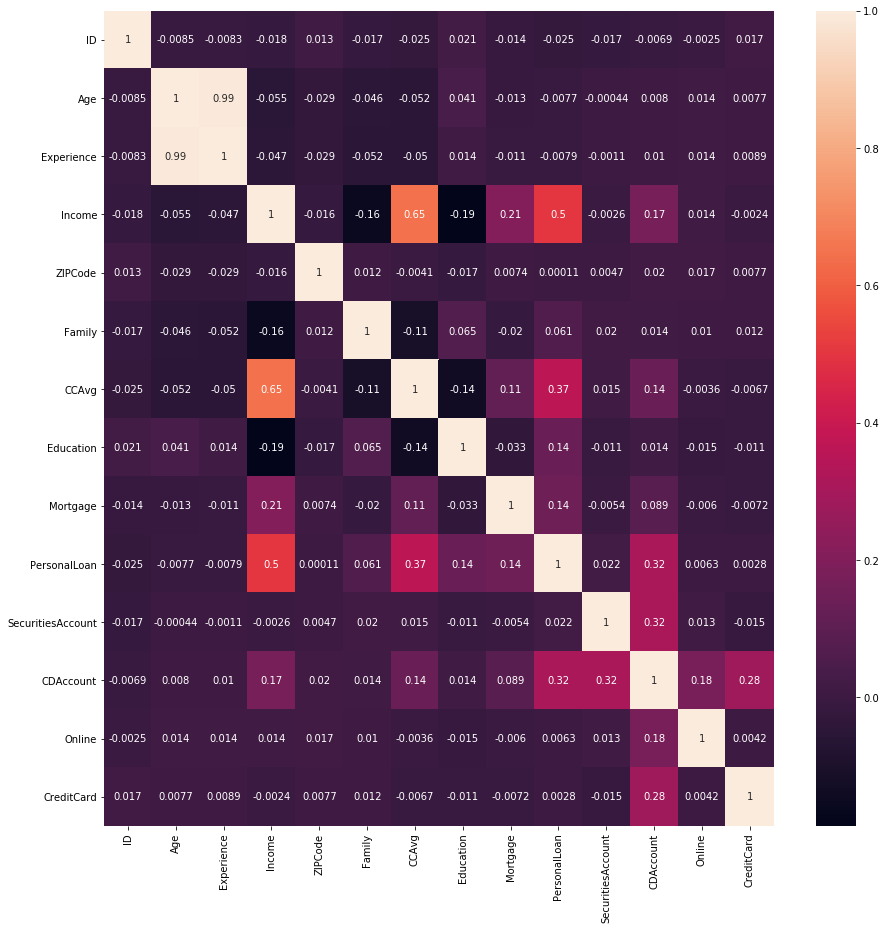

In [13]:
plt.figure(figsize=(15, 15))
sns.heatmap(df1.corr(),annot=True)

#### Age, Experience have high + correlation, 0.99
#### Income and CCavg are also correlated 0.65
#### Income and Personal Loan are correlated 0.50


In [14]:
df1.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

C:\Users\212586743\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


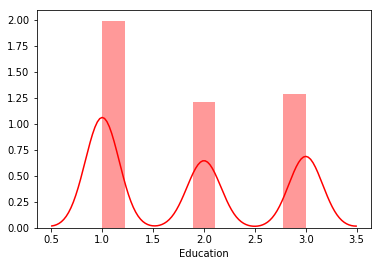

In [15]:
##sns.boxplot('Income','Personal Loan',data=df1)
sns.distplot( df1[df1.PersonalLoan == 0]['Education'], color = 'r')

In [14]:
print(len(df1))
df1.groupby('PersonalLoan').count()
## in the dataset out of 5000 record, 480 are having perosnal loan

5000


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
PersonalLoan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


### Check Data Distribution

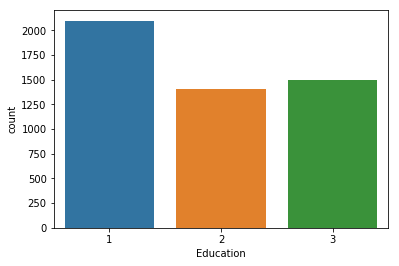

In [15]:
sns.countplot(x='Education',data=df1)   ## most of the people are undergrad

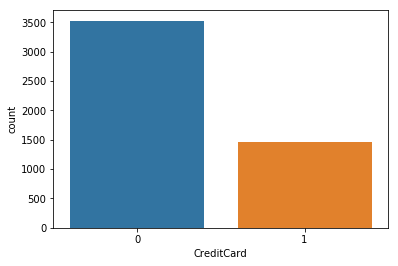

In [16]:
sns.countplot(x='CreditCard',data=df1)

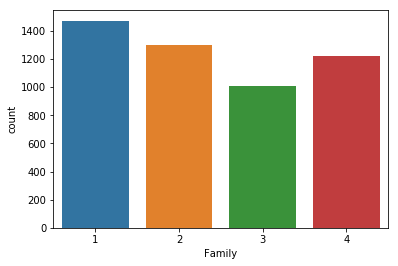

In [17]:
sns.countplot(x='Family',data=df1)

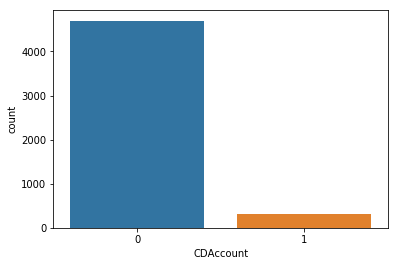

In [18]:
sns.countplot(x='CDAccount',data=df1) ## Most of the customer not having certificate of deposit (CD)

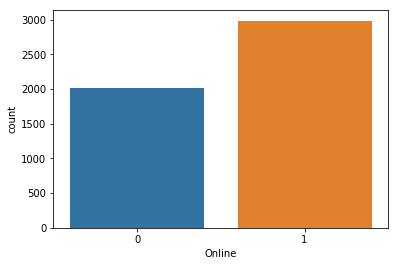

In [19]:
sns.countplot(x='Online',data=df1)  ## no of people are more who use internet banking

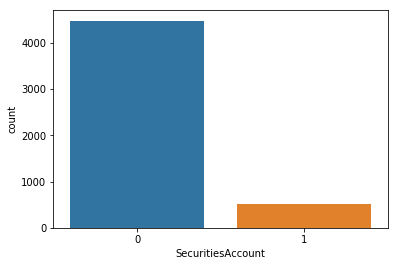

In [20]:
sns.countplot(x='SecuritiesAccount',data=df1) ## most of the customer dont have security account

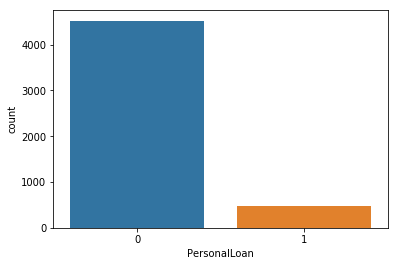

In [21]:
sns.countplot(x='PersonalLoan',data=df1)

## As target variable is binary (0 or 1) we can go with any categorical regression
### 1 Build Model using logistic regression

In [22]:
X=df1.drop('PersonalLoan',axis=1)

In [23]:
Y=df1['PersonalLoan']

In [24]:
X.head(2)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## 70% of 5000 rec is kept for training,30% for testing

In [35]:
print(X_train.shape)
print(X_test.shape)

(3500, 13)
(1500, 13)


In [36]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.908


C:\Users\212586743\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### Confusion metrics

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[1319   32]
 [ 106   43]]


### Out of 1500 record, (1319+43)=1362 records are predicted correctly and (106+32)=138 records are wrongly predicted. As data is biased to person not having loan, ie. more records with no personal loan, we should check Precision, Recall

In [40]:
## percentage of correct prediction, it is same as model score
(1319+43)/(1319+32+106+43)

0.908

In [39]:
Recall=(96/236+96)
Precision = (96/80+96)
print ("Recall:{} Precision:{}".format(Recall,Precision))

Recall:96.40677966101696 Precision:97.2


### 2. Cross validation/Kfold

In [53]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10,random_state=7)
modelCV=LogisticRegression()
scoring = 'accuracy'
result = model_selection.cross_val_score(modelCV,X_train,y_train,cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (result.mean()))

10-fold cross validation average accuracy: 0.902


#### The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well.

## 3. Desicion Tree Model

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')

In [93]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [94]:
dt_model.score(X_test,y_test)

0.97971428571428576

In [95]:
y_predict=dt_model.predict(X_test)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix  
confusion_matrix(y_test,y_predict)

array([[3130,   38],
       [  33,  299]], dtype=int64)

In [97]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      3168
          1       0.89      0.90      0.89       332

avg / total       0.98      0.98      0.98      3500



In [98]:
Recall = (292/(40+292))
Precision = (292/(33+292))
print("Recall:{}".format(Recall))
print("Precision:{}".format(Precision))

Recall:0.8795180722891566
Precision:0.8984615384615384


### Overall model accuracy/score improved in decision tree model but precsision has decreased

## Model comparison, ensamble technique

In [102]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LR: 0.907200 (0.007600)
LDA: 0.940800 (0.008207)
KNN: 0.900000 (0.015388)
CART: 0.979000 (0.009808)
NB: 0.887000 (0.010440)
SVM: 0.904000 (0.012522)


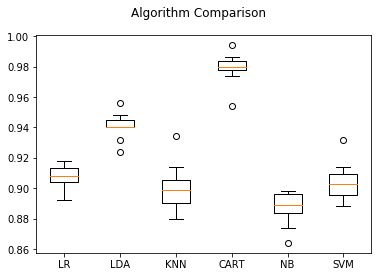

In [103]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Decision tree mode is giving higher accuracy and GaussianNB is giving lowest accuracy

In [105]:
cv_results.mean()

0.90399999999999991